![](../nci-logo.png)

-------
# Data Access and Manipulation Using iPython Notebooks
## Using the GDAL library to read NetCDF data



### In this notebook:

- Using iPython Notebooks with NetCDF data within the VDI
    - <a href='#part1'>Launch Jupyter Notebook</a>  
    - <a href='#part2'>Importing Python libraries</a>  
    - <a href='#part3'>Opening file and viewing contents</a> 
    - <a href='#part4'>Extracting data and subsets of data</a>
    - <a href='#part5'>Plotting data</a>
        - <a href='#part5a'>Basic plotting</a>
        - <a href='#part5b'>RGB composite plotting</a>

   
#### The following material uses Geoscience Australia's Landsat 8 Data Collection which is available under the Creative Commons License 4.0. For more information on the collection and licensing, please [click here](http://geonetwork.nci.org.au/geonetwork/srv/eng/catalog.search#/metadata/f6600_8228_7170_1486). 


---------

<br>


<a id='part1'></a> 
## Launch the Jupyter Notebook application

#### Using pre-built VDI modules:

Load the `python`, `ipython`, and `netcdf4-python` modules:

```
    $ module load python/2.7.11
    $ module load python/2.7.11-matplotlib
    $ module load ipython/4.2.0-py2.7
    $ module load gdal/1.11.1-python
```    
    
<br>
Launch the Jupyter Notebook application:
```
    $ jupyter notebook
``` 

<div class="alert alert-info">
<b>NOTE: </b> This will launch the <b>Notebook Dashboard</b> within a new web browser window. 
</div>

<br>

#### Using virtual environments:

To use along with customised python packages in a virtual environment, begin by following the steps in **Python on the VDI: Part II**. 

Once you have a virtual environment setup with your packages (including `Jupyter`), proceed by loading the required modules and activating the virtual environment:

```
    $ module load python/2.7.11
    $ source <path_to_virtual_environment>/bin/activate
```

<br>
Then, as above, launch the Jupyter Notebook application:

```
    $ jupyter notebook
```    
    
<div class="alert alert-warning">
<b>NOTE: </b> If you have already followed <b>Python on the VDI: Part II</b>, you should have installed the netcdf4-python package, which is required in the remainder of this notebook.  
</div>

<br>


<br>


<a id='part2'></a> 
## Import python modules

In [2]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fn = '/g/data2/rs0/datacube/002/LS8_OLI_NBART/-10_-28/LS8_OLI_NBART_3577_-10_-28_2013_v1493805443.nc'

<a id='part3'></a> 
## Open and view file metadata

In [4]:
ds = gdal.Open(fn)

### View metadata

In [5]:
for key, value in ds.GetMetadata().items():
    print "{:35}: {}".format(key, value)

NC_GLOBAL#license                  : Creative Commons Attribution 4.0 International (CC-BY 4.0)
NC_GLOBAL#geospatial_lat_min       : -25.58404616639011
NC_GLOBAL#date_created             : 2016-04-12T11:11:39.320375
NC_GLOBAL#geospatial_lat_units     : degrees_north
NC_GLOBAL#source                   : This data is a reprojection and retile of Landsat surface reflectance scene data.
NC_GLOBAL#history                  : NetCDF-CF file created by datacube version '1.0.2' at 20160412.
NC_GLOBAL#geospatial_bounds_crs    : EPSG:4326
NC_GLOBAL#geospatial_lat_max       : -24.62761795684222
NC_GLOBAL#title                    : Experimental Data files From the Australian Geoscience Data Cube - DO NOT USE
NC_GLOBAL#geospatial_lon_min       : 121.9234014997891
NC_GLOBAL#geospatial_lon_max       : 122.9983988091495
NC_GLOBAL#Conventions              : CF-1.6, ACDD-1.3
NC_GLOBAL#geospatial_bounds        : POLYGON((122.002096767 -24.6276179568, 121.9234015 -25.517253234, 122.927490078 -25.5840461664

### View subdatasets

In [6]:
for item in ds.GetSubDatasets():
    print item[0]

NETCDF:"/Users/kdruken/Downloads/LS8_OLI_TIRS_NBAR_3577_-10_-28_2013.nc":band_6
NETCDF:"/Users/kdruken/Downloads/LS8_OLI_TIRS_NBAR_3577_-10_-28_2013.nc":band_7
NETCDF:"/Users/kdruken/Downloads/LS8_OLI_TIRS_NBAR_3577_-10_-28_2013.nc":band_4
NETCDF:"/Users/kdruken/Downloads/LS8_OLI_TIRS_NBAR_3577_-10_-28_2013.nc":band_5
NETCDF:"/Users/kdruken/Downloads/LS8_OLI_TIRS_NBAR_3577_-10_-28_2013.nc":band_2
NETCDF:"/Users/kdruken/Downloads/LS8_OLI_TIRS_NBAR_3577_-10_-28_2013.nc":band_3
NETCDF:"/Users/kdruken/Downloads/LS8_OLI_TIRS_NBAR_3577_-10_-28_2013.nc":band_1
NETCDF:"/Users/kdruken/Downloads/LS8_OLI_TIRS_NBAR_3577_-10_-28_2013.nc":extra_metadata


<a id='part4'></a> 
## Extract/view data subdataset
Subdatasets can be opened using the syntax: **"NETCDF:filename:variable"** or alternatively, the GetSubDatasets() function can be used to grab this information. 

In [7]:
# Option 1
band2 = gdal.Open('NETCDF:"/Users/kdruken/Downloads/LS8_OLI_TIRS_NBAR_3577_-10_-28_2013.nc":band_2')

# Option 2
band2 = gdal.Open(ds.GetSubDatasets()[4][0])

In [8]:
print 'Band shape (T, Y, X): ', (band2.RasterCount, band2.RasterYSize, band2.RasterXSize)

Band shape (T, Y, X):  (61, 4000, 4000)


#### The GetMetadata() function can be used on the subdataset
**Note:** The variable metadata is not as user-friendly as with other netcdf python tools (e.g., netCDF4, h5py)

In [9]:
print 'long_name: ', band2.GetMetadata()['band_2#long_name']
print 'xdim: ', band2.GetMetadata()['x#long_name']
print 'ydim: ', band2.GetMetadata()['y#long_name']

long_name:  Nadir BRDF Adjusted Reflectance 0.45-0.51 microns (Blue)
xdim:  x coordinate of projection
ydim:  y coordinate of projection


#### Use the 'GetProjection' to check whether the variable's CRS information is readable by GDAL

In [10]:
band2.GetProjection()

'PROJCS["GDA94 / Australian Albers",GEOGCS["GDA94",DATUM["Geocentric_Datum_of_Australia_1994",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6283"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.01745329251994328,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4283"]],UNIT["metre",1,AUTHORITY["EPSG","9001"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["standard_parallel_1",-18],PARAMETER["standard_parallel_2",-36],PARAMETER["latitude_of_center",0],PARAMETER["longitude_of_center",132],PARAMETER["false_easting",0],PARAMETER["false_northing",0],AUTHORITY["EPSG","3577"],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

#### Using the 'GetGeoTransform' we can calculate the spatial extents

In [11]:
geoTransform = band2.GetGeoTransform()
minx = geoTransform[0]
maxy = geoTransform[3]
maxx = minx + geoTransform[1]*band2.RasterXSize
miny = maxy + geoTransform[5]*band2.RasterYSize
print "Spatial extent [minx,miny,maxx,maxy]: ", [minx,miny,maxx,maxy]

Spatial extent [minx,miny,maxx,maxy]:  [-1000000.0, -2800000.0, -900000.0, -2700000.0]


<a id='part5'></a> 
## Plotting data

<a id='part5a'></a>
### Basic plotting of data subset

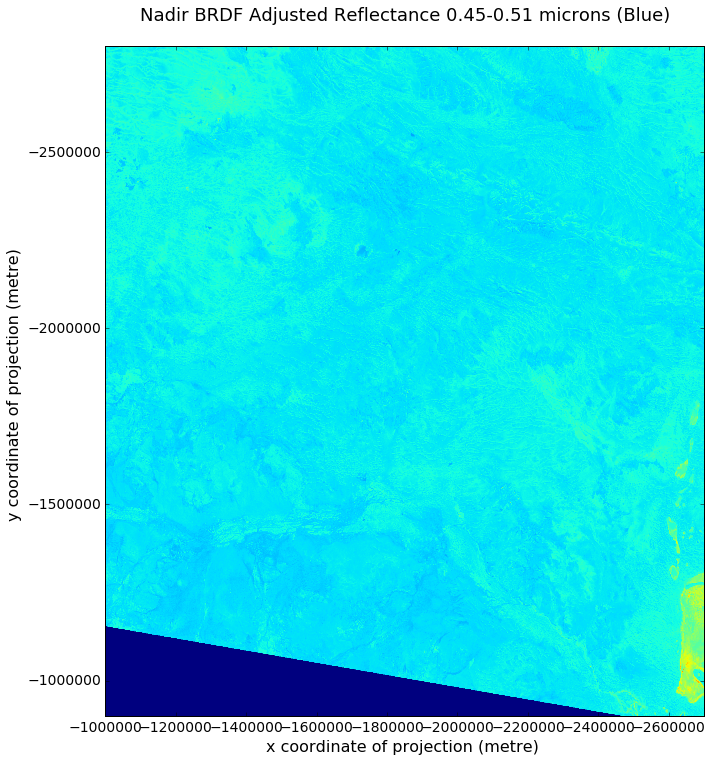

In [12]:
# Set figure size
plt.figure(figsize=(12,12))

# Subset indices
x1, x2 = 1000,3999
y1, y2 = 0,3000
t1 = 9

# Plot data subset with equal axes and colorbar
plt.imshow(band2.ReadAsArray()[t1,y1:y2,x1:x2], extent=[minx,maxy,maxx,miny], cmap='gist_earth')

# Add figure title and labels
# We can make use of the defined variable attributes to do this
plt.title(band2.GetMetadata()['band_2#long_name']+'\n', fontsize=18)
plt.xlabel(band2.GetMetadata()['x#long_name']+' ('+band2.GetMetadata()['x#units']+') ', fontsize=16)
plt.ylabel(band2.GetMetadata()['y#long_name']+' ('+band2.GetMetadata()['y#units']+') ', fontsize=16)

# Adjust tick mark size
plt.tick_params(labelsize=14)



<a id='part5b'></a> 
### Plotting RGB images
For more info on common band combinations: http://landsat.usgs.gov/L8_band_combos.php

#### Read in bands
**Note**: Bands must be clipped (value of 3000 was chosen in this case) and scaled to values between (0, 255) to plot as RGB image.

In [13]:
band4 = gdal.Open(ds.GetSubDatasets()[2][0])
band6 = gdal.Open(ds.GetSubDatasets()[0][0])
band7 = gdal.Open(ds.GetSubDatasets()[1][0])

In [14]:
b4 = band4.ReadAsArray()[t1,y1:y2,x1:x2]
b6 = band6.ReadAsArray()[t1,y1:y2,x1:x2]
b7 = band7.ReadAsArray()[t1,y1:y2,x1:x2]

In [15]:
b4 = b4.clip(0, 3000) / 3000. * 255
b6 = b6.clip(0, 3000) / 3000. * 255
b7 = b7.clip(0, 3000) / 3000. * 255

#### Combine the bands of interest into numpy NxNx3 dimensional array
**Note**: The data type must be converted to 'uint8' to plot as image

In [16]:
rgb = np.stack((b7, b6, b4), axis=2).astype('uint8')

print "New array shape: {0}, dtype: {1}".format(rgb.shape, rgb.dtype)

New array shape: (3000, 2999, 3), dtype: uint8


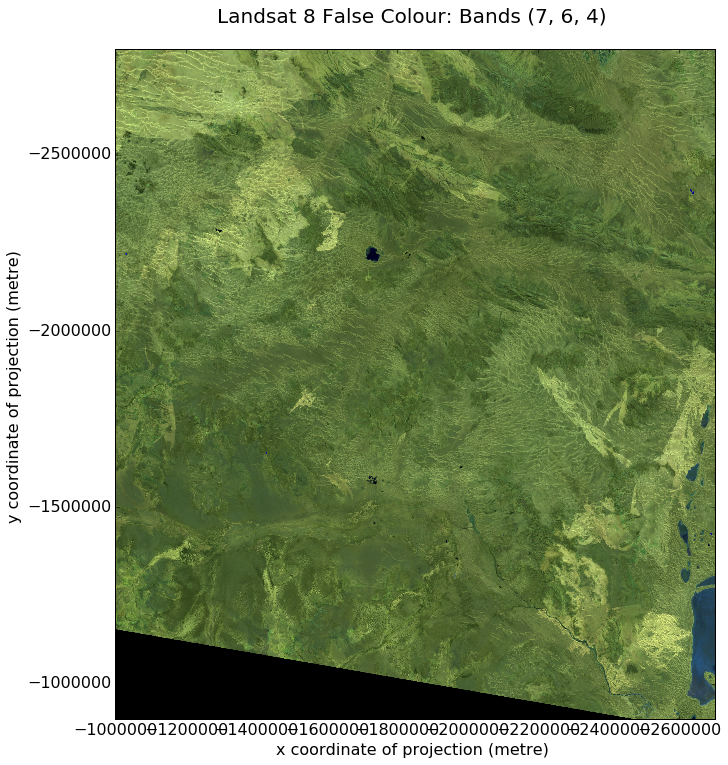

In [17]:
# Set figure size
plt.figure(figsize=(12,12))

# Plot image
plt.imshow(rgb, extent=[minx,maxy,maxx,miny])

# Add figure title and labels
plt.title('Landsat 8 False Colour: Bands (7, 6, 4) \n', fontsize=20)
plt.xlabel(band2.GetMetadata()['x#long_name']+' ('+band2.GetMetadata()['x#units']+') ', fontsize=16)
plt.ylabel(band2.GetMetadata()['y#long_name']+' ('+band2.GetMetadata()['y#units']+') ', fontsize=16)


# Adjust tick mark size
plt.tick_params(labelsize=16)